In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#  1.Temperature (T) in the range 1.81°C and 37.11°C,
#  2. Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
# 3. Relative Humidity (RH) in the range 25.56% to 100.16%
#   4. Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
#  5. Net hourly electrical energy output (EP) 420.26-495.76 MW


In [3]:
# read train data of power plant
train=pd.read_csv('E:/DSS/gilthub projects/10-Power Plant Data Analysis/train.csv',delimiter=",")
train

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38
...,...,...,...,...,...
7171,9.32,37.73,1022.14,79.49,477.91
7172,11.20,41.38,1021.65,61.89,476.87
7173,29.80,69.34,1009.36,64.74,437.65
7174,16.37,54.30,1017.94,63.63,459.97


In [4]:
train.head(5)

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [5]:
train.tail(5)

,# T,V,AP,RH,EP
7171,9.32,37.73,1022.14,79.49,477.91
7172,11.20,41.38,1021.65,61.89,476.87
7173,29.80,69.34,1009.36,64.74,437.65
7174,16.37,54.30,1017.94,63.63,459.97
7175,30.11,62.04,1010.69,47.96,444.42


In [7]:
train.shape

(7176, 5)

In [11]:
# Ep is target variable
y_train=train[" EP"]

In [12]:
del train[" EP"]

In [13]:
train.head()

,# T,V,AP,RH
0,8.58,38.38,1021.03,84.37
1,21.79,58.20,1017.21,66.74
2,16.64,48.92,1011.55,78.76
3,31.38,71.32,1009.17,60.42
4,9.20,40.03,1017.05,92.46


In [14]:
y_train.head()

0    482.26
1    446.94
2    452.56
3    433.44
4    480.38
Name:  EP, dtype: float64

In [15]:
train.describe()

,# T,V,AP,RH
count,7176.000000,7176.000000,7176.000000,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818
std,7.475256,12.751468,5.964863,14.625093
min,1.810000,25.360000,992.890000,25.560000
25%,13.470000,41.740000,1009.010000,63.202500
50%,20.315000,52.050000,1012.910000,74.895000
75%,25.720000,66.540000,1017.302500,84.925000
max,35.770000,81.560000,1033.300000,100.160000


In [16]:
train.shape

(7176, 4)

In [17]:
y_train.shape

(7176,)

In [19]:
# verification of null vallues
train.isnull().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

In [20]:
train.isna().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

# Exploratory data analysis

In [29]:
#calculate minimum of EP
ep_min=y_train.min()
ep_max=y_train.max()
ep_mean=y_train.mean()
ep_median=y_train.median()
ep_std=y_train.std()
ep_qnt1=y_train.quantile(0.15)
ep_qnt3=y_train.quantile(0.9)
eq_qntint=ep_qnt3-ep_qnt1

In [31]:
#Statastics for Combined Cycle Power plant
print("Statastics for Combined Cycle Power plant")
print("Min_EP :",ep_min)
print("Max_EP :",ep_max)
print("Mean_EP :",ep_mean)
print("Median_EP :",ep_median)
print("Stnd_EP :",ep_std)
print("Quant1_EP :",ep_qnt1)
print("Quant3_EP :",ep_qnt3)
print("INTQuant_EP :",eq_qntint)

Statastics for Combined Cycle Power plant
Min_EP : 420.26
Max_EP : 495.76
Mean_EP : 454.43129319955347
Median_EP : 451.74
Stnd_EP : 17.134571175425727
Quant1_EP : 435.7025
Quant3_EP : 479.03
INTQuant_EP : 43.327499999999986


C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


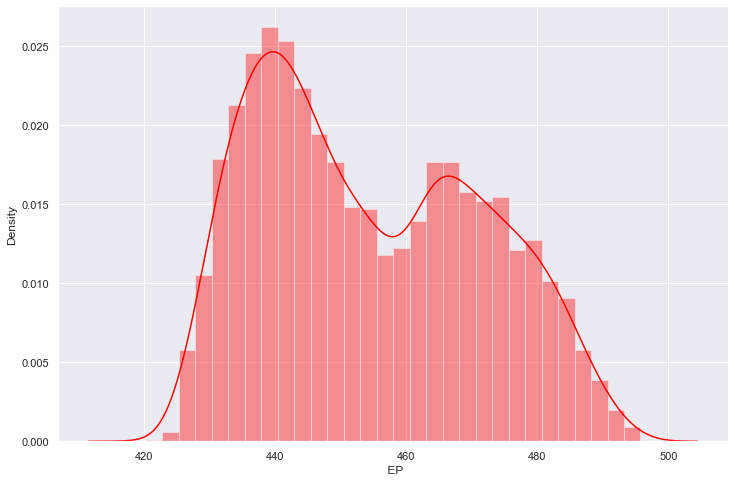

In [34]:
sb.set(rc={'figure.figsize':(12,8)})
sb.distplot(y_train,bins=30,color='red')
plt.show()

In [36]:
# Corelation of data sets
corr_train=train.copy()
corr_train['EP']=y_train
corr_train.head(10)

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38
5,26.82,69.23,1013.28,50.86,436.36
6,9.48,40.80,1023.82,78.98,485.36
7,9.41,41.54,1019.48,82.19,481.59
8,31.03,69.59,1007.77,63.96,432.56
9,18.24,59.15,1012.00,84.40,449.48


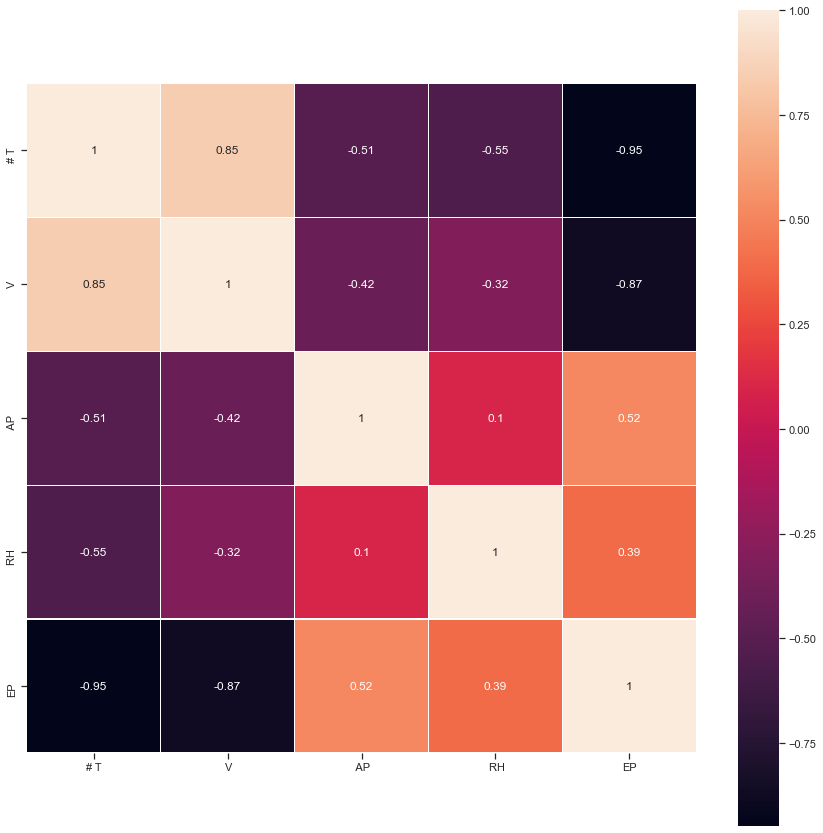

In [39]:
sb.set(style='ticks',color_codes=True)
plt.figure(figsize=(15,15))
sb.heatmap(corr_train.astype('float32').corr(),linewidths=0.1,square=True,annot=True,color='pink')
plt.show()

# Feature Plots


In [41]:
train.columns

Index(['# T', ' V', ' AP', ' RH'], dtype='object')

In [42]:
corr_train.columns

Index(['# T', ' V', ' AP', ' RH', 'EP'], dtype='object')

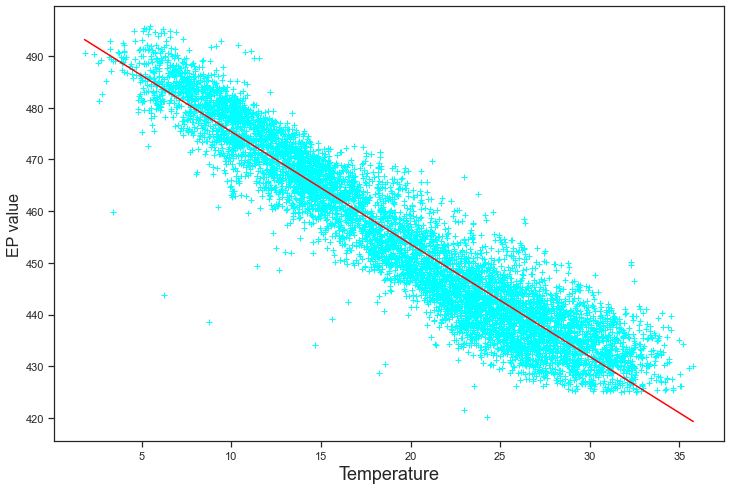

In [63]:
plt.plot(corr_train["# T"],corr_train["EP"],'+',color='cyan')
plt.plot(np.unique(corr_train["# T"]),np.poly1d(np.polyfit(corr_train["# T"],corr_train["EP"],1))
         (np.unique(corr_train["# T"])),color='red')
plt.xlabel('Temperature', fontsize=18)
plt.ylabel('EP value', fontsize=16)
title=("Temperature Vs EP value plot")
plt.show()

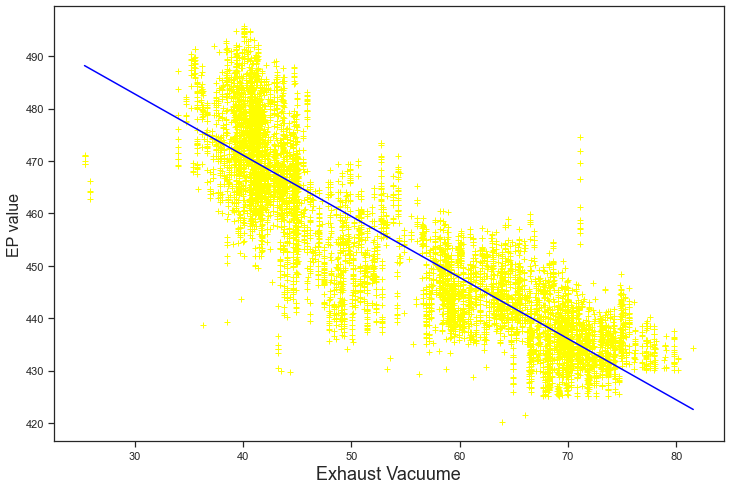

In [65]:
plt.plot(corr_train[" V"],corr_train["EP"],'+',color='yellow')
plt.plot(np.unique(corr_train[" V"]),np.poly1d(np.polyfit(corr_train[" V"],corr_train["EP"],1))
         (np.unique(corr_train[" V"])),color='blue')
plt.xlabel('Exhaust Vacuume', fontsize=18)
plt.ylabel('EP value', fontsize=16)
title=("Exhaust Vacuum Vs EP value plot")
plt.show()

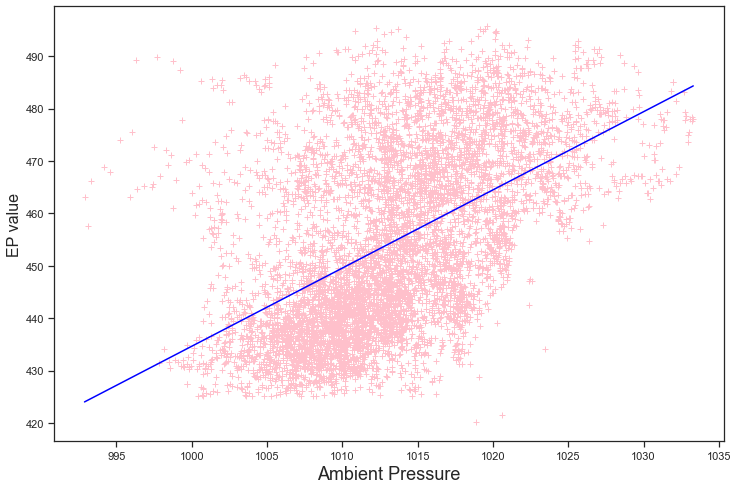

In [66]:
plt.plot(corr_train[" AP"],corr_train["EP"],'+',color='pink')
plt.plot(np.unique(corr_train[" AP"]),np.poly1d(np.polyfit(corr_train[" AP"],corr_train["EP"],1))
         (np.unique(corr_train[" AP"])),color='blue')
plt.xlabel('Ambient Pressure', fontsize=18)
plt.ylabel('EP value', fontsize=16)
title=("Exhaust Vacuum Vs EP value plot")
plt.show()

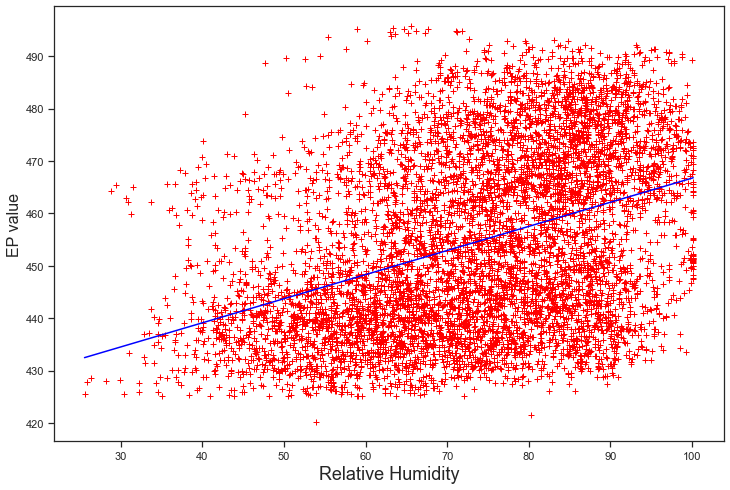

In [67]:
plt.plot(corr_train[" RH"],corr_train["EP"],'+',color='red')
plt.plot(np.unique(corr_train[" RH"]),np.poly1d(np.polyfit(corr_train[" RH"],corr_train["EP"],1))
         (np.unique(corr_train[" RH"])),color='blue')
plt.xlabel('Relative Humidity', fontsize=18)
plt.ylabel('EP value', fontsize=16)
title=("Exhaust Vacuum Vs EP value plot")
plt.show()

# Box plot analysis

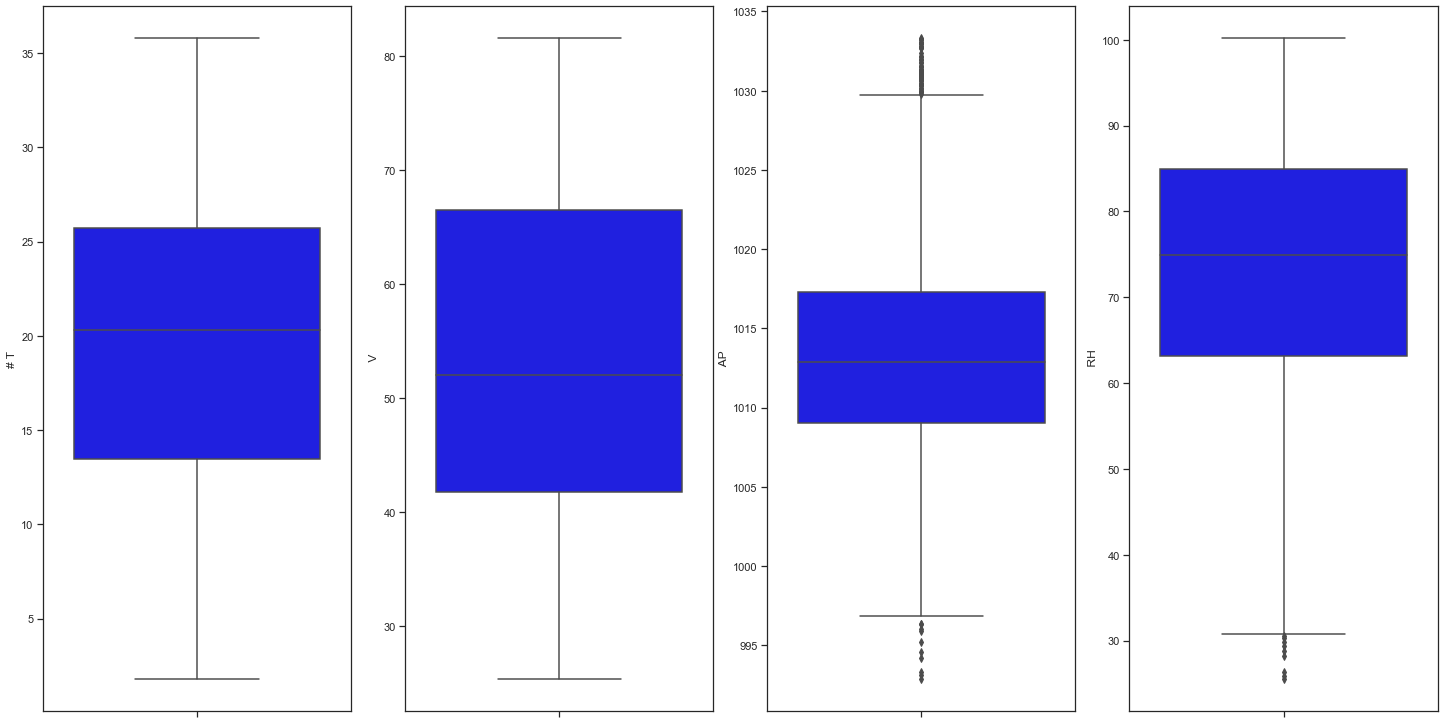

In [69]:
fig, ax=plt.subplots(ncols=4, nrows=1, figsize=(20,10))
index=0
ax=ax.flatten()
for i,v in train.items():
    sb.boxplot(y=i,data=train, ax=ax[index], color='blue')
    index+=1
    plt.tight_layout(pad=0.4, w_pad=0.5)

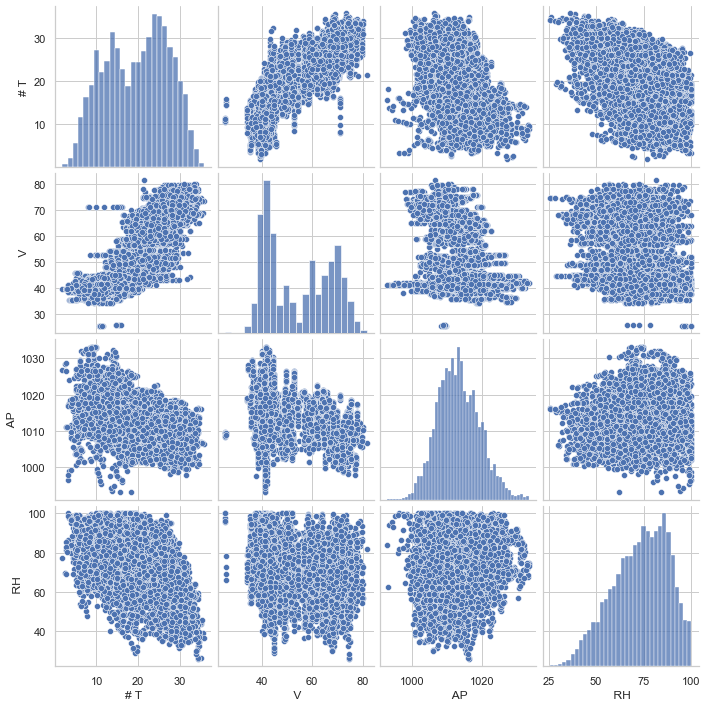

In [70]:
sb.set(style='whitegrid')
features_plot=train.columns
sb.pairplot(train[features_plot]);
plt.tight_layout
plt.show()

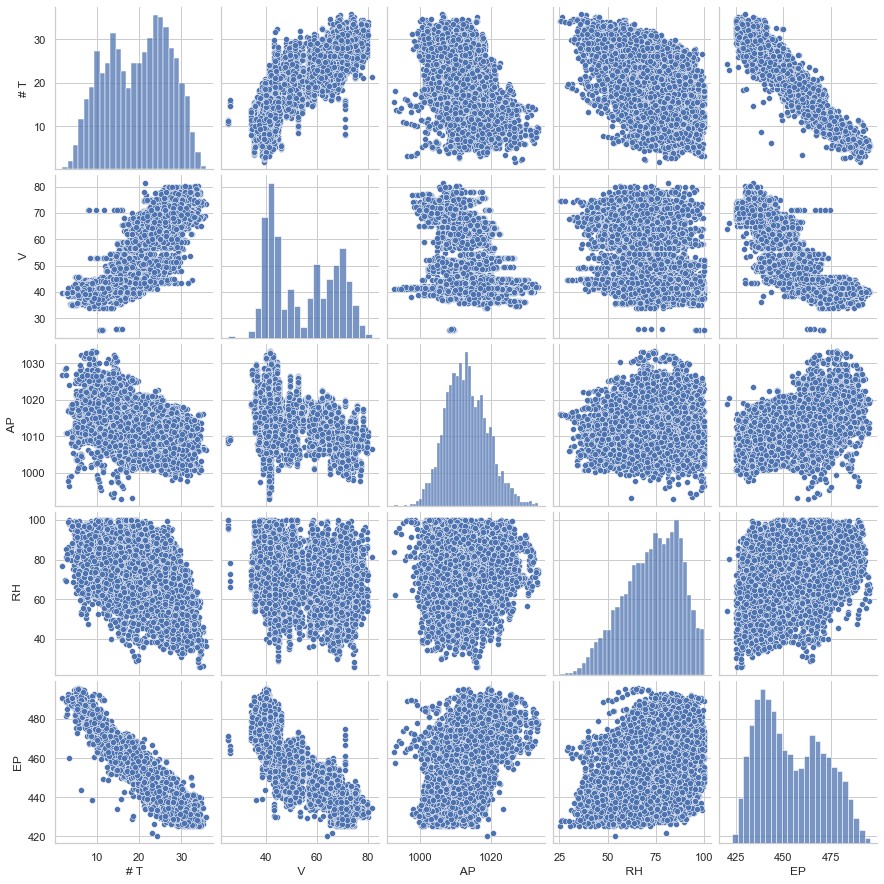

In [71]:
sb.set(style='whitegrid')
features_plot=corr_train.columns
sb.pairplot(corr_train[features_plot]);
plt.tight_layout
plt.show()

# Features scaling

In [72]:
# preprocessing
from sklearn.preprocessing import StandardScaler

In [73]:
scaler=StandardScaler()

In [75]:
train.columns

Index(['# T', ' V', ' AP', ' RH'], dtype='object')

In [74]:
scaler.fit_transform(train)

array([[-1.47827466e+00, -1.24764165e+00,  1.30221067e+00,
         7.58624590e-01],
       [ 2.89012041e-01,  3.06797549e-01,  6.61749044e-01,
        -4.46921842e-01],
       [-3.99975582e-01, -4.21012529e-01, -2.87207194e-01,
         3.75010552e-01],
       ...,
       [ 1.36062192e+00,  1.18048335e+00, -6.54382840e-01,
        -5.83682640e-01],
       [-4.36097263e-01,  9.29089763e-04,  7.84140927e-01,
        -6.59584883e-01],
       [ 1.40209496e+00,  6.07960340e-01, -4.31394890e-01,
        -1.73110573e+00]])

# Building gradient decent model

In [76]:
x_train=train

In [77]:
x_train.shape, y_train.shape

((7176, 4), (7176,))

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)
print(GBR)

GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)


In [83]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)

In [84]:
# prediction and testing
# call test data csv file
x_test=pd.read_csv('E:/DSS/gilthub projects/10-Power Plant Data Analysis/test.csv',delimiter=",")
y_train.ravel(order='A')
y_pred=GBR.predict(x_test)

In [85]:
y_pred

array([461.71928633, 434.22314744, 441.80480823, ..., 443.59570999,
       457.24078238, 443.65087566])

# Modle evaluation

In [86]:
GBR.score(x_train,y_train)

0.998540993407853

In [90]:
# Save the prediction values in csv file
np.savetxt('ypredict.csv',y_pred,fmt="%.5f")